In [2]:
import numpy as np
import pandas as pd
import kagglehub

d:\Programming\Deep_Learning\.deeplr\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:

# Download latest version
path = kagglehub.dataset_download("rakeshrau/social-network-ads")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\sande\.cache\kagglehub\datasets\rakeshrau\social-network-ads\versions\1


In [4]:
import os 
print("Files in the dataset directory:",os.listdir(path))


Files in the dataset directory: ['Social_Network_Ads.csv']


In [5]:
df= pd.read_csv(os.path.join(path, "Social_Network_Ads.csv"))
print("First 5 rows of the dataset:")
print(df.head())
print("Shape of the dataset:", df.shape)

First 5 rows of the dataset:
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
Shape of the dataset: (400, 5)


In [6]:
df.info()
print("Data types of the columns:")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
Data types of the columns:


In [7]:
df = df.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

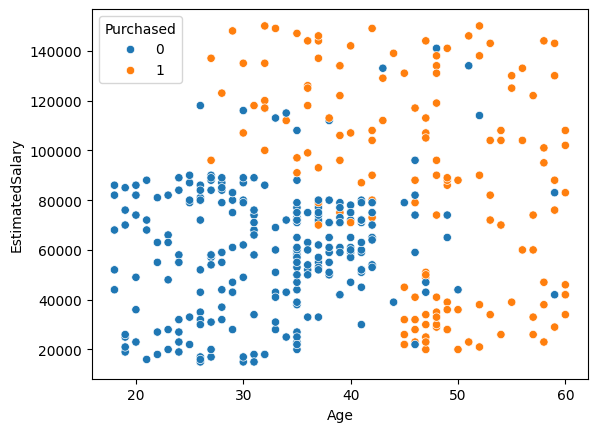

In [8]:
import seaborn as sns

sns.scatterplot(x='Age', y='EstimatedSalary', hue='Purchased', data=df)

In [9]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [11]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [12]:
model = Sequential()
model.add(Dense(units=128, activation='relu', input_shape=(2,)))
model.add(Dense(units=1, activation='sigmoid'))

d:\Programming\Deep_Learning\.deeplr\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history=model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.3977 - loss: 1333.7533 - val_accuracy: 0.6000 - val_loss: 610.8575
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5896 - loss: 340.4477 - val_accuracy: 0.4000 - val_loss: 101.3078
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5815 - loss: 107.5841 - val_accuracy: 0.4000 - val_loss: 72.0029
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4113 - loss: 81.1478 - val_accuracy: 0.4000 - val_loss: 93.5753
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4972 - loss: 65.7194 - val_accuracy: 0.6000 - val_loss: 65.1170
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5538 - loss: 40.8836 - val_accuracy: 0.6000 - val_loss: 23.4354
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5461 - loss: 20.1747 - val_accuracy: 0.6000 - val_loss: 6.0012
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5208 - loss: 25.7771 

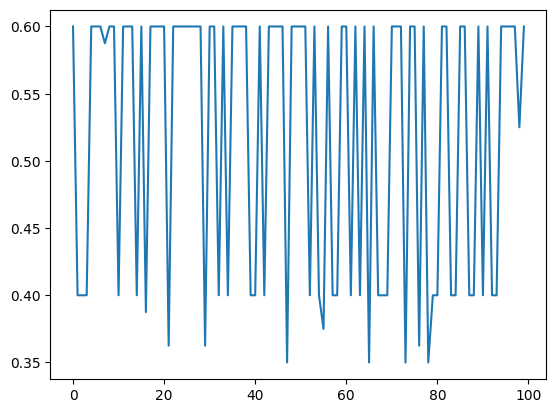

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

Applying Scaling

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_Scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
X_train_Scaled

array([[ 0.88928823, -0.65924556],
       [-0.17254846,  0.87392651],
       [-1.04132394, -0.36440478],
       [ 0.98581884,  0.6085698 ],
       [-0.94479333,  0.57908572],
       [ 0.40663519,  0.01888824],
       [ 0.98581884,  2.11225779],
       [ 0.31010458, -0.30543662],
       [ 1.7580637 , -0.27595254],
       [-0.17254846,  2.20071003],
       [ 1.7580637 ,  1.0213469 ],
       [-1.33091576, -1.48479975],
       [ 2.04765553,  0.54960165],
       [ 1.27541066,  1.90586924],
       [-1.13785454,  0.31372902],
       [-0.36560968, -0.77718187],
       [-1.71703819,  0.49063349],
       [-0.5586709 , -1.51428383],
       [ 0.31010458, -0.71821372],
       [ 0.02051275, -0.57079333],
       [ 0.02051275,  0.04837232],
       [-0.07601785, -0.51182517],
       [-0.6552015 , -1.51428383],
       [ 0.02051275,  0.31372902],
       [ 0.31010458,  0.07785639],
       [-0.46214029, -1.13099081],
       [-0.75173211, -1.54376791],
       [-0.26907907, -0.65924556],
       [-1.13785454,

<Axes: >

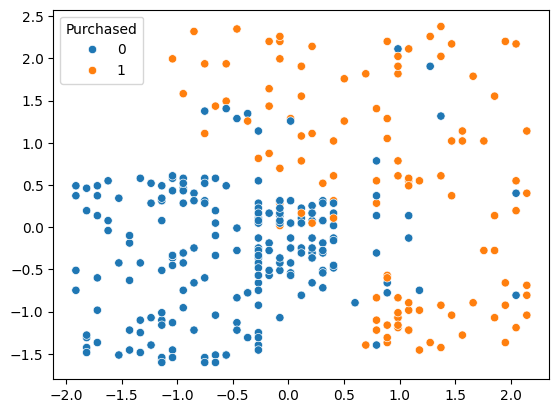

In [18]:
sns.scatterplot(x=X_train_Scaled[:,0], y=X_train_Scaled[:,1], hue=y_train)

In [19]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(X_train_Scaled,y_train,epochs=100,validation_data=(X_test_scaled,y_test))

Epoch 1/100


d:\Programming\Deep_Learning\.deeplr\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.5215 - loss: 0.6714 - val_accuracy: 0.8125 - val_loss: 0.6229
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7492 - loss: 0.6171 - val_accuracy: 0.8625 - val_loss: 0.5695
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8645 - loss: 0.5590 - val_accuracy: 0.8250 - val_loss: 0.5244
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8628 - loss: 0.5248 - val_accuracy: 0.8250 - val_loss: 0.4872
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8573 - loss: 0.4918 - val_accuracy: 0.8250 - val_loss: 0.4552
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8635 - loss: 0.4588 - val_accuracy: 0.8250 - val_loss: 0.4289
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8778 - loss: 0.4265 - val_accuracy: 0.8125 - val_loss: 0.4055
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8538 - loss: 0.4231 - val_accuracy: 0.8250 - val_lo

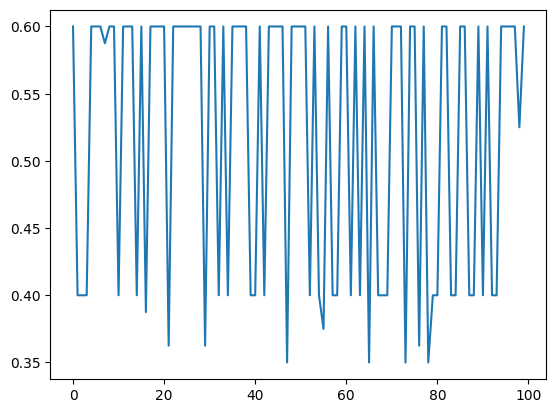

In [20]:
plt.plot(history.history['val_accuracy'])